### Feature Engineering and outlier removal.

In [298]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [299]:
path="C:\\Users\MyPc\\Desktop\\Project-Housing_splitted\\train.csv"
data_train=pd.read_csv(path)
path="C:\\Users\MyPc\\Desktop\\Project-Housing_splitted\\test.csv"
data_test=pd.read_csv(path)

In [300]:
data_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


In [301]:
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(data_train['LotFrontage'].median())
data_train['MasVnrArea'] = data_train['MasVnrArea'].fillna(data_train['MasVnrArea'].mode()[0])


In [302]:
data_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,70.0,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


In [303]:
data_train.drop(['Alley'],axis=1,inplace=True)
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [304]:
data_train.drop(['PoolQC'],axis=1,inplace=True)
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,224,0,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,0,6,2009,WD,Normal,215000


In [305]:
data_train.drop(['MiscFeature'],axis=1,inplace=True)
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,224,0,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,6,2009,WD,Normal,215000


In [306]:
data_train['BsmtQual']=data_train['BsmtQual'].fillna(0)
data_train['BsmtQual'].isna().sum()

0

In [307]:
data_train['BsmtQual']

0       Gd
1       TA
2       Gd
3       Gd
4       Gd
        ..
1163    TA
1164     0
1165    Gd
1166    TA
1167    Gd
Name: BsmtQual, Length: 1168, dtype: object

In [308]:
data_test['BsmtQual']=data_test['BsmtQual'].fillna(0)

In [309]:
data_train['BsmtCond']=data_train['BsmtCond'].fillna(0)
data_train['BsmtExposure']=data_train['BsmtExposure'].fillna(0)
data_train['BsmtFinType1']=data_train['BsmtFinType1'].fillna(0)
data_train['BsmtFinType2']=data_train['BsmtFinType2'].fillna(0)
data_train['FireplaceQu']=data_train['FireplaceQu'].fillna(0)
data_train['GarageType']=data_train['GarageType'].fillna(0)
data_train['GarageYrBlt']=data_train['GarageYrBlt'].fillna(0)
data_train['GarageFinish']=data_train['GarageFinish'].fillna(0)
data_train['GarageQual']=data_train['GarageQual'].fillna(0)
data_train['GarageCond']=data_train['GarageCond'].fillna(0)
data_train['Fence']=data_train['Fence'].fillna(0)


In [310]:
# only taking the continuous features:
train_features=data_train[['MSSubClass','LotFrontage', 'LotArea', 'OverallQual','OverallCond',
                   'YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
                   'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                   'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                  'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','WoodDeckSF','OpenPorchSF',
                  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']]

In [311]:
test_features=data_test[['MSSubClass','LotFrontage', 'LotArea', 'OverallQual','OverallCond',
                   'YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
                   'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                   'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                  'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','WoodDeckSF','OpenPorchSF',
                  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']]

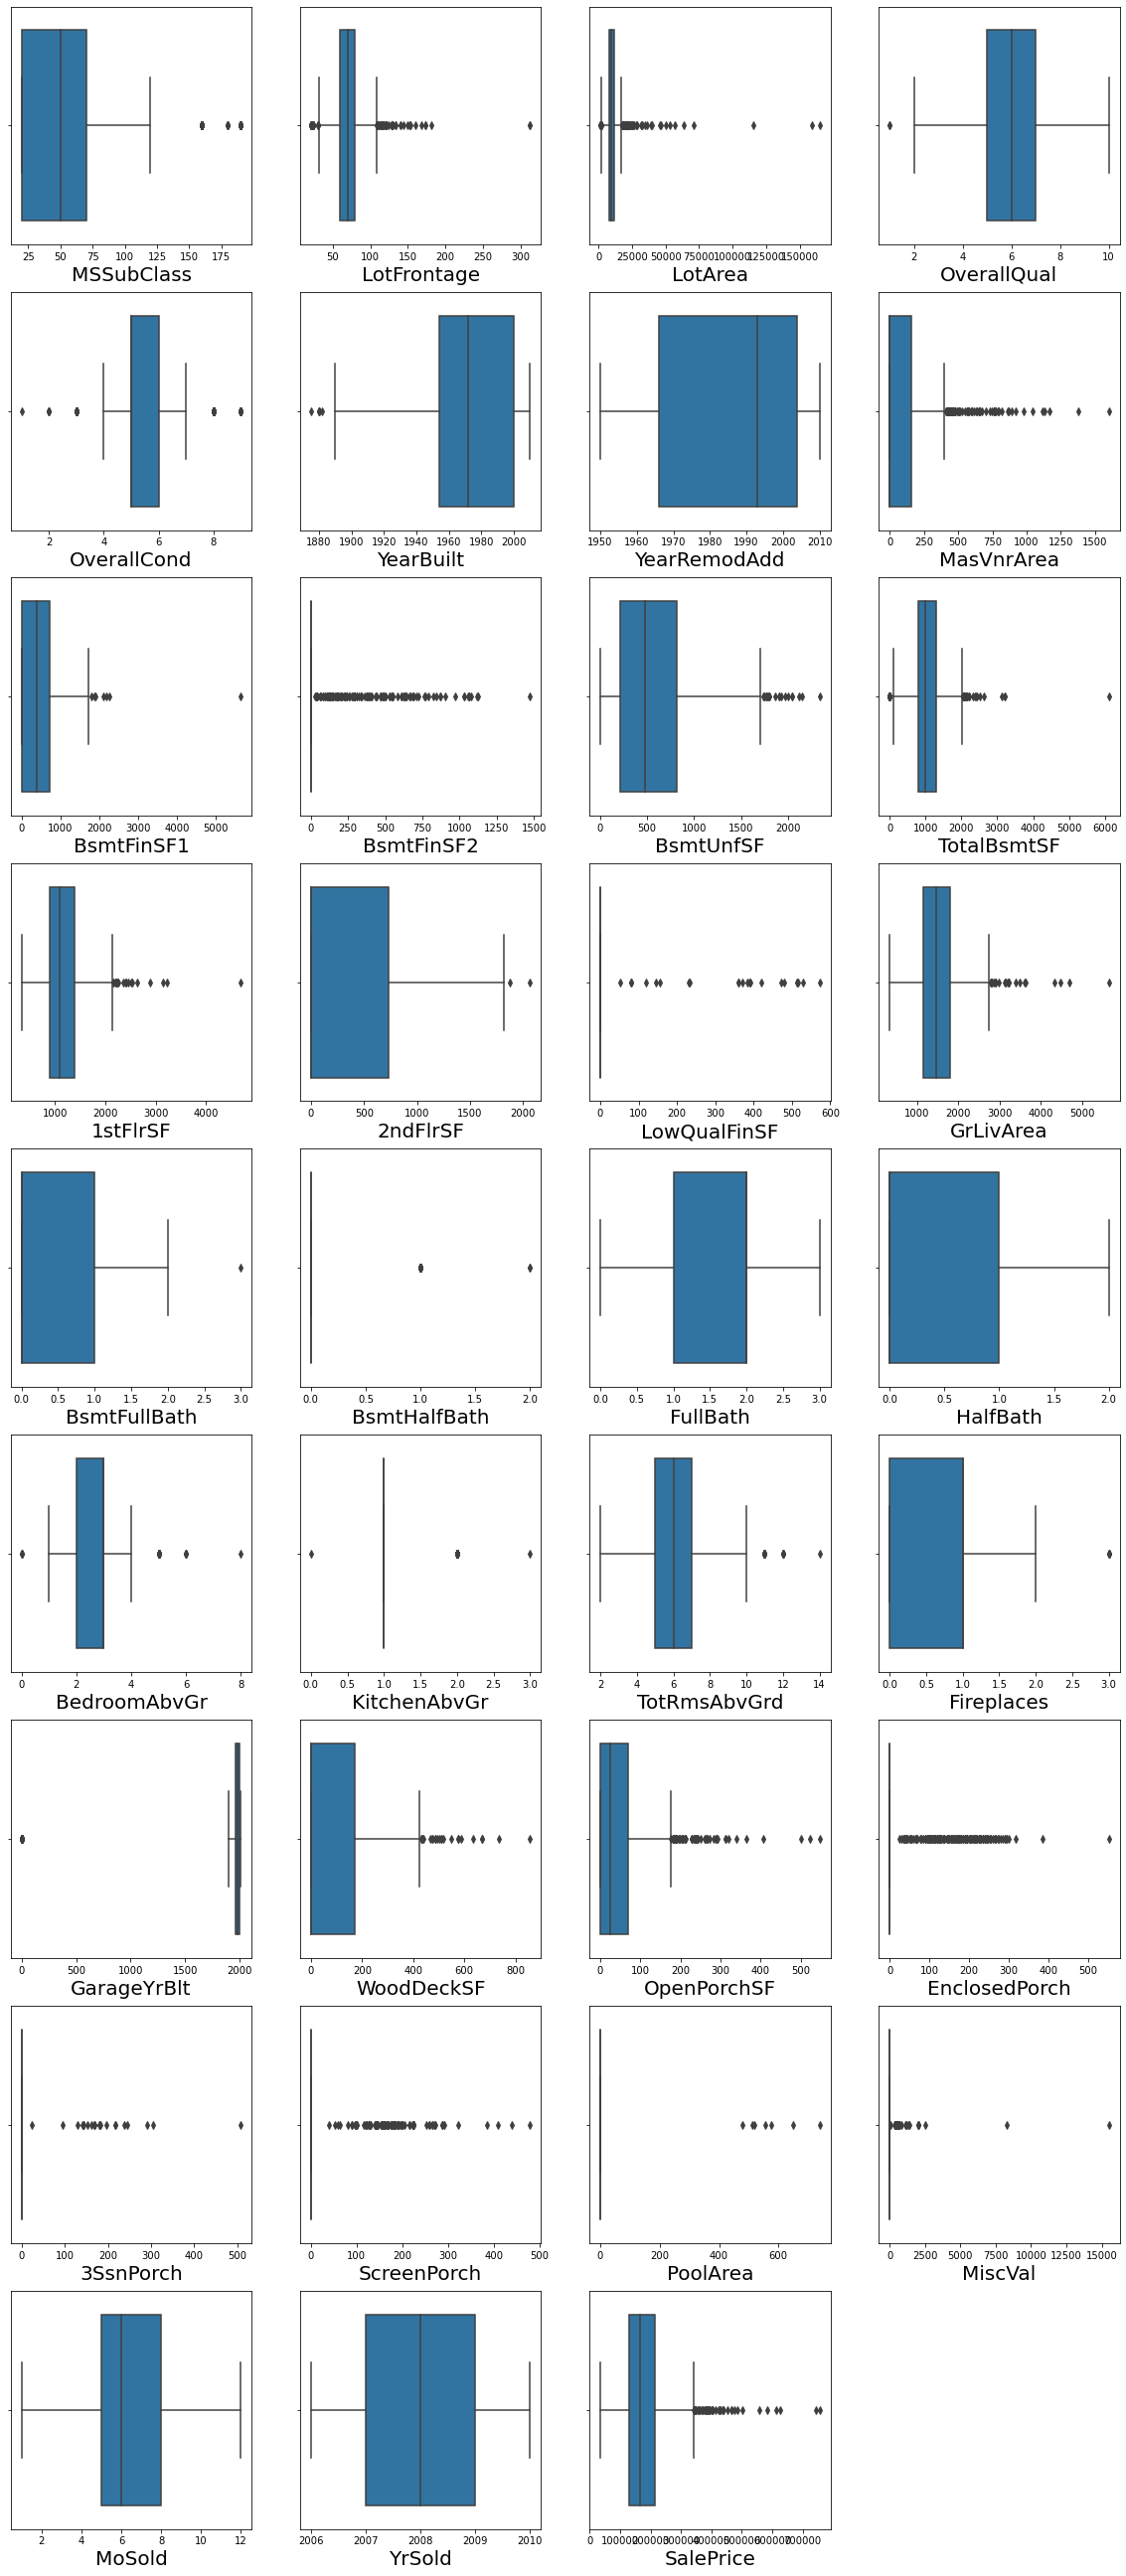

In [312]:
#outliers from data_train
plt.figure(figsize=(20,52),facecolor='white')
plotnumber=1
for column in train_features:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(train_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

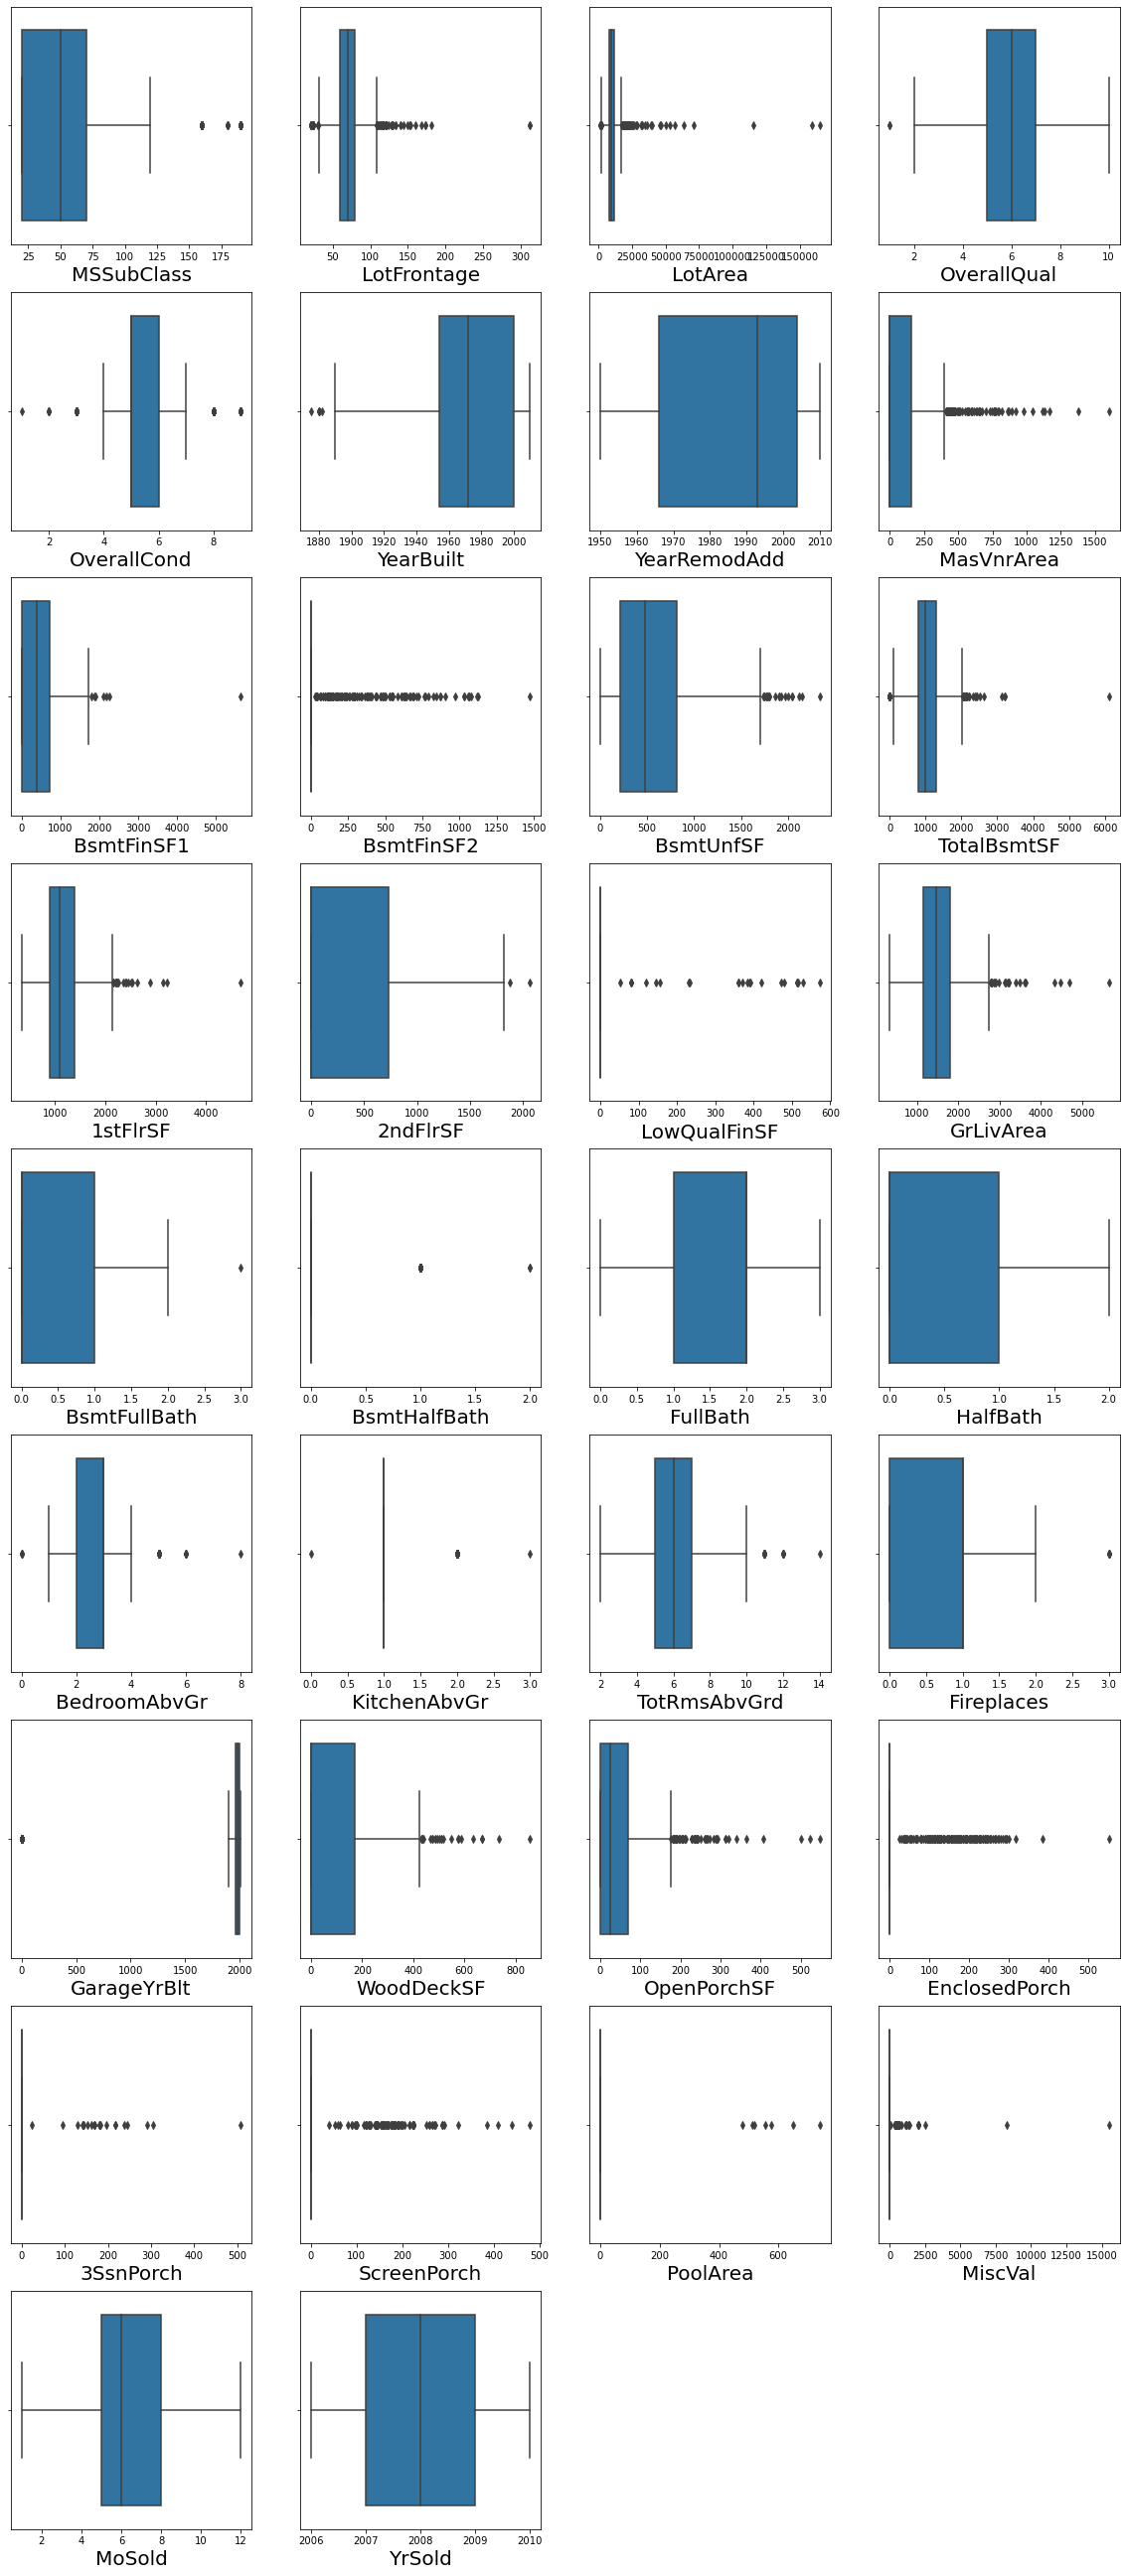

In [313]:
#outliers from data_test
plt.figure(figsize=(20,52),facecolor='white')
plotnumber=1
for column in test_features:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(train_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [314]:
#Getting all the columns having outliers together from train
df_tr=[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','Fence']]

In [315]:
#Getting all the columns having outliers together from test
df_ts=[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','Fence']]

In [316]:
data_train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

<AxesSubplot:>

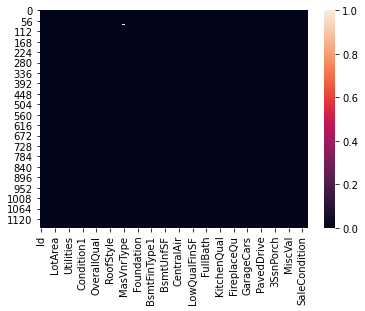

In [317]:
sns.heatmap(data_train.isnull())

In [318]:
data_train.dropna(inplace=True)


<AxesSubplot:>

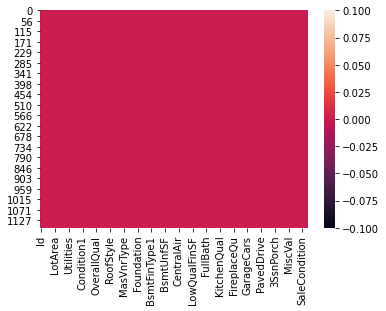

In [319]:
sns.heatmap(data_train.isnull())

In [320]:
data_test['BsmtCond']=data_test['BsmtCond'].fillna(0)
data_test['BsmtExposure']=data_test['BsmtExposure'].fillna(0)
data_test['BsmtFinType1']=data_test['BsmtFinType1'].fillna(0)
data_test['BsmtFinType2']=data_test['BsmtFinType2'].fillna(0)
data_test['FireplaceQu']=data_test['FireplaceQu'].fillna(0)
data_test['GarageType']=data_test['GarageType'].fillna(0)
data_test['GarageYrBlt']=data_test['GarageYrBlt'].fillna(0)
data_test['GarageFinish']=data_test['GarageFinish'].fillna(0)
data_test['GarageQual']=data_test['GarageQual'].fillna(0)
data_test['GarageCond']=data_test['GarageCond'].fillna(0)
data_test['Fence']=data_test['Fence'].fillna(0)


In [321]:
data_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,224,0,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2006,New,Partial,219210
6,561,20,RL,70.0,11341,Pave,IR1,Lvl,AllPub,Inside,...,0,95,0,0,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,GdPrv,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,GdPrv,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2008,COD,Abnorml,118500


In [322]:
data_train['Fence'].value_counts()

0        924
MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

In [323]:
data_test.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [324]:
data_test['LotFrontage'] = data_test['LotFrontage'].fillna(data_test['LotFrontage'].median())

In [325]:
data_test['BsmtCond'].value_counts()

TA    270
Gd      9
0       7
Fa      6
Name: BsmtCond, dtype: int64

In [326]:
data_test.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,0,NaN,0,7,2007,WD,Normal
1,1018,120,RL,65.0,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,0,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,65.0,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,0,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,0,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,0,NaN,0,1,2008,WD,Normal
5,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal
6,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,0,NaN,0,5,2006,WD,Normal
7,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,0,NaN,0,1,2008,New,Partial
8,427,80,RL,65.0,12800,Pave,NaN,Reg,Low,AllPub,...,396,0,NaN,0,NaN,0,8,2009,WD,Normal
9,776,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,0,NaN,0,6,2009,WD,Normal


In [327]:
data_test['LotFrontage'] = data_test['LotFrontage'].fillna(data_test['LotFrontage'].median())
data_test['MasVnrArea'] = data_test['MasVnrArea'].fillna(data_test['MasVnrArea'].mode()[0])

In [328]:
data_test.drop(['Alley'],axis=1,inplace=True)
data_test.drop(['PoolQC'],axis=1,inplace=True)
data_test.drop(['MiscFeature'],axis=1,inplace=True)

In [329]:
data_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 77, dtype: int64

<AxesSubplot:>

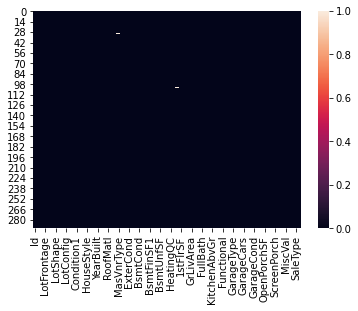

In [330]:
sns.heatmap(data_test.isnull())

In [331]:
data_test.dropna(inplace=True)

<AxesSubplot:>

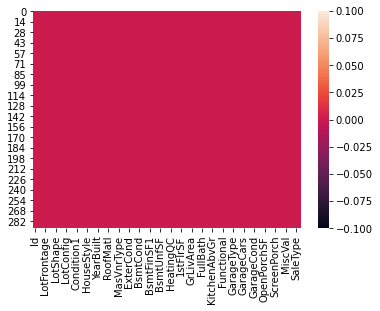

In [332]:
sns.heatmap(data_test.isnull())

In [333]:
data_test.shape

(290, 77)

In [334]:
data_train.shape

(1161, 78)

In [335]:
#getting the skewed columns together.
# taking all the features with skewness in a single list
features=['MSSubClass','LotArea','MasVnrArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
          'LowQualFinSF','BsmtHalfBath','KitchenAbvGr','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
          'ScreenPorch','MiscVal']

In [336]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
data_train[features]=pt.fit_transform(data_train[features].values)
data_train[features]

,MSSubClass,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,1.369611,-1.213649,-0.816841,-0.364256,0.904165,0.103411,-0.457100,-0.871782,-0.142165,-0.239535,-0.167811,-0.961937,1.412884,-0.411319,-0.138979,-0.298527,-0.193736
1,-1.168456,1.103701,-0.816841,2.746760,1.027512,2.382274,2.135619,-0.871782,-0.142165,-0.239535,-0.167811,0.778401,1.417371,-0.411319,-0.138979,3.349808,-0.193736
2,0.489485,0.159491,-0.816841,-0.364256,-0.502353,0.189774,0.060768,1.176412,-0.142165,-0.239535,-0.167811,1.041852,1.202668,-0.411319,-0.138979,-0.298527,-0.193736
3,-1.168456,0.497979,1.386578,-0.364256,1.160506,1.681129,1.583530,-0.871782,-0.142165,-0.239535,-0.167811,-0.961937,1.173408,-0.411319,-0.138979,-0.298527,-0.193736
4,-1.168456,1.200026,1.148011,-0.364256,-0.224764,1.205925,1.155505,-0.871782,-0.142165,4.174754,-0.167811,1.133842,-1.059560,-0.411319,-0.138979,-0.298527,-0.193736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-1.168456,0.139117,0.802787,-0.364256,-0.042913,-0.344190,-0.658246,-0.871782,-0.142165,-0.239535,-0.167811,-0.961937,-1.059560,-0.411319,-0.138979,-0.298527,-0.193736
1164,-1.168456,-0.083665,-0.816841,-0.364256,-2.040344,-3.153487,0.057960,-0.871782,-0.142165,-0.239535,-0.167811,-0.961937,1.063143,-0.411319,-0.138979,-0.298527,-0.193736
1165,1.699833,-2.680878,-0.816841,-0.364256,-0.403242,-0.407835,-0.824318,1.100895,-0.142165,-0.239535,-0.167811,0.802449,-1.059560,-0.411319,-0.138979,-0.298527,-0.193736
1166,0.695947,-0.147158,-0.816841,-0.364256,0.397386,-0.912985,-1.730397,1.121826,-0.142165,-0.239535,-0.167811,-0.961937,0.799724,2.433247,-0.138979,-0.298527,-0.193736


In [337]:
data_train.skew()

Id                0.029138
MSSubClass        0.064062
LotFrontage       2.749159
LotArea           0.034314
OverallQual       0.170481
OverallCond       0.583460
YearBuilt        -0.574545
YearRemodAdd     -0.489333
MasVnrArea        0.430259
BsmtFinSF1        1.892704
BsmtFinSF2        2.384147
BsmtUnfSF        -0.285500
TotalBsmtSF       0.289607
1stFlrSF         -0.002218
2ndFlrSF          0.280142
LowQualFinSF      6.900833
GrLivArea         1.461174
BsmtFullBath      0.636430
BsmtHalfBath      3.940312
FullBath          0.056265
HalfBath          0.666574
BedroomAbvGr      0.253079
KitchenAbvGr     -2.363587
TotRmsAbvGrd      0.651009
Fireplaces        0.672677
GarageYrBlt      -3.884916
GarageCars       -0.354026
GarageArea        0.192768
WoodDeckSF        0.109012
OpenPorchSF      -0.000367
EnclosedPorch     2.022504
3SsnPorch         7.065479
ScreenPorch       3.055206
PoolArea         13.203388
MiscVal           4.974365
MoSold            0.217326
YrSold            0.113638
S

In [338]:
data_test.skew()

Id               -0.100720
MSSubClass        1.359137
LotFrontage       0.501905
LotArea          12.737692
OverallQual       0.397657
OverallCond       1.199357
YearBuilt        -0.747577
YearRemodAdd     -0.525548
MasVnrArea        1.968430
BsmtFinSF1        0.744442
BsmtFinSF2        3.683400
BsmtUnfSF         0.950637
TotalBsmtSF       0.524303
1stFlrSF          0.688588
2ndFlrSF          0.767011
LowQualFinSF     10.891877
GrLivArea         1.002090
BsmtFullBath      0.466930
BsmtHalfBath      3.530161
FullBath         -0.037048
HalfBath          0.764683
BedroomAbvGr      0.071122
KitchenAbvGr      4.830897
TotRmsAbvGrd      0.802823
Fireplaces        0.529679
GarageYrBlt      -3.761658
GarageCars       -0.272615
GarageArea        0.134995
WoodDeckSF        1.701982
OpenPorchSF       2.176360
EnclosedPorch     3.163278
3SsnPorch        12.234950
ScreenPorch       4.165795
PoolArea          0.000000
MiscVal          13.219299
MoSold            0.187861
YrSold            0.026263
d

In [339]:
# taking all the features with skewness in a single list
t_features=['MSSubClass','LotArea','MasVnrArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
          'LowQualFinSF','BsmtHalfBath','KitchenAbvGr','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
          'ScreenPorch','MiscVal']

In [340]:
data_test[t_features]=pt.fit_transform(data_test[features].values)#using power transformer
data_test.skew()

Id               -0.100720
MSSubClass        0.090047
LotFrontage       0.501905
LotArea           0.000000
OverallQual       0.397657
OverallCond       1.199357
YearBuilt        -0.747577
YearRemodAdd     -0.525548
MasVnrArea        0.365422
BsmtFinSF1        0.744442
BsmtFinSF2        2.557759
BsmtUnfSF        -0.236968
TotalBsmtSF      -0.035218
1stFlrSF         -0.000696
2ndFlrSF          0.286208
LowQualFinSF      9.729089
GrLivArea         1.002090
BsmtFullBath      0.466930
BsmtHalfBath      3.530161
FullBath         -0.037048
HalfBath          0.764683
BedroomAbvGr      0.071122
KitchenAbvGr      4.236802
TotRmsAbvGrd      0.802823
Fireplaces        0.529679
GarageYrBlt      -3.761658
GarageCars       -0.272615
GarageArea        0.134995
WoodDeckSF        0.211216
OpenPorchSF      -0.059825
EnclosedPorch     2.153904
3SsnPorch        11.978715
ScreenPorch       3.316816
PoolArea          0.000000
MiscVal           5.129088
MoSold            0.187861
YrSold            0.026263
d

In [341]:
##Getting all the categorical columns together.
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir','Fence',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [342]:
con_df=pd.concat([data_train,data_test],axis=0) ##concatinating the datasets(train and test).

### For same columns in test and train there are differnt value counts of categories.

In [343]:
##Applying one_hot_encoding to all the columns.
def category_onehot_multcols(multcolumns):
    df_con=con_df
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(con_df[fields],drop_first=True)
        con_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_con=df1.copy()
        else:
            df_con=pd.concat([df_con,df1],axis=1)
        i=i+1
    df_con=pd.concat([con_df,df_con],axis=1)
        
    return df_con

In [344]:
con_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Fence
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [345]:
con_df =con_df.loc[:,~con_df.columns.duplicated()]## removing the duplicat columns.

In [346]:
con_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Typ,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,P
0,127,1.369611,70.0,-1.213649,6,5,1976,1976,-0.816841,120,...,1,0,1,0,0,0,0,0,1,0
1,889,-1.168456,95.0,1.103701,8,6,1970,1970,-0.816841,351,...,1,0,1,0,0,0,0,0,0,0
2,793,0.489485,92.0,0.159491,7,5,1996,1997,-0.816841,862,...,1,0,1,0,0,0,0,0,0,0
3,110,-1.168456,105.0,0.497979,6,6,1977,1977,1.386578,705,...,1,0,1,0,0,0,0,0,1,0
4,422,-1.168456,70.0,1.200026,6,7,1977,2000,1.148011,1246,...,1,0,1,0,0,0,0,1,0,0


In [347]:
### Need to seperate the train and test dataset again.
df_Train=con_df.iloc[:1161,:]
df_Test=con_df.iloc[1161:,:]

In [348]:
df_Train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Typ,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,P
0,127,1.369611,70.0,-1.213649,6,5,1976,1976,-0.816841,120,...,1,0,1,0,0,0,0,0,1,0
1,889,-1.168456,95.0,1.103701,8,6,1970,1970,-0.816841,351,...,1,0,1,0,0,0,0,0,0,0
2,793,0.489485,92.0,0.159491,7,5,1996,1997,-0.816841,862,...,1,0,1,0,0,0,0,0,0,0
3,110,-1.168456,105.0,0.497979,6,6,1977,1977,1.386578,705,...,1,0,1,0,0,0,0,0,1,0
4,422,-1.168456,70.0,1.200026,6,7,1977,2000,1.148011,1246,...,1,0,1,0,0,0,0,1,0,0


In [349]:
df_Test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Typ,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,P
0,337,-1.151031,86.0,0.0,9,5,2005,2006,1.183310,1249,...,1,0,1,0,0,0,0,1,0,0
1,1018,1.336676,65.0,0.0,8,5,1984,1984,-0.845603,1036,...,1,0,1,0,0,0,0,0,1,0
2,929,-1.151031,65.0,0.0,8,5,2001,2001,-0.845603,0,...,1,0,1,0,0,0,0,0,1,0
3,1148,0.704737,75.0,0.0,7,7,1941,1950,-0.845603,275,...,1,0,1,0,0,0,0,0,0,0
4,1227,0.506716,86.0,0.0,6,5,2007,2007,0.953632,0,...,1,0,0,0,1,0,0,1,0,0


In [350]:
df_Test['SalePrice'] ### to remove the column as it contains nan values. 

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
287   NaN
288   NaN
289   NaN
290   NaN
291   NaN
Name: SalePrice, Length: 290, dtype: float64

In [351]:
df_Test.drop(['SalePrice'],axis=1, inplace=True)

In [352]:
df_Test.shape

(290, 186)

In [353]:
df_Train.shape

(1161, 187)

###### after one-hot encoding the number of columns for both the datasets have increased df_Test= 186 , df_Train = 187.

In [354]:
### Seperating into x and y 
x=df_Train.drop(['SalePrice'],axis=1)
y=df_Train['SalePrice']

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>],
       [<AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>],
       [<AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>],
       [<AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'3SsnPorch'}>,
        <AxesSubplot:title={'center':'ScreenPorch'}>],
       [<AxesSubplot:title={'center':'MiscVal'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

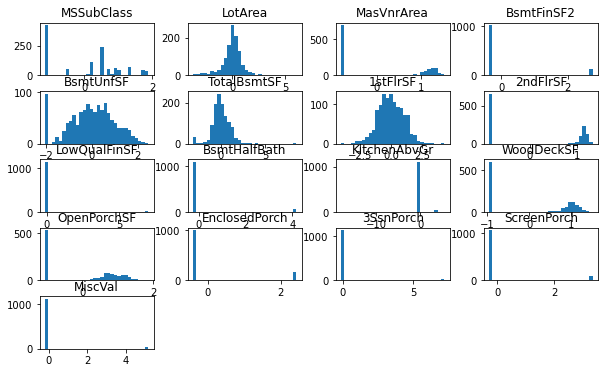

In [355]:
df_Train[features].hist(grid=False,
       figsize=(10, 6),
       bins=30)

##### We can see that the data set is more or less distributed .

In [356]:
df_Train.drop(['Id'],axis=1,inplace=True)

In [357]:
df_Test.drop(['Id'],axis=1,inplace=True)

In [358]:
x=df_Train.drop(['SalePrice'],axis=1)
y=df_Train['SalePrice']

In [359]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [360]:
df_Test.shape

(290, 185)

In [361]:
df_Train.shape

(1161, 186)

In [362]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [363]:
print(model.feature_importances_)

[3.44867707e-03 2.47764819e-03 7.17193311e-03 2.40565835e-01
 4.40452163e-03 2.45256144e-02 1.53163144e-02 1.87417310e-03
 1.13016008e-02 6.12703855e-04 2.44281520e-03 1.23151773e-02
 1.49677688e-02 3.61985170e-03 4.00241829e-04 8.15640246e-02
 6.06391571e-03 2.87353903e-04 4.84556731e-02 2.67527305e-03
 5.86731314e-03 1.71899571e-03 1.09940852e-02 1.65097249e-02
 3.96311076e-03 1.14634568e-01 1.27437746e-02 2.13588695e-03
 4.29685239e-03 9.75665434e-04 1.38390136e-03 1.13452469e-03
 2.93954667e-04 2.13663718e-04 4.36946508e-03 2.29823170e-03
 2.71118773e-04 8.51857251e-05 2.52449648e-03 2.63898041e-03
 5.05694129e-05 1.75149952e-03 1.85034951e-04 2.51602351e-03
 4.77953626e-04 9.15624061e-04 1.60542628e-03 0.00000000e+00
 1.16622171e-03 4.94104296e-04 1.35163878e-04 1.45239430e-03
 5.06012611e-04 1.12205620e-04 1.33343744e-05 7.73840457e-05
 3.08071559e-04 1.51476116e-03 9.33876389e-04 3.52173241e-03
 4.58556897e-03 4.55528683e-04 3.10468789e-04 1.26042393e-04
 2.00672135e-04 4.341993

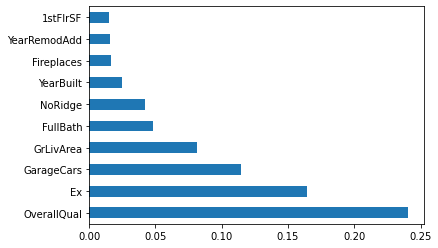

In [364]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [365]:
print(x.shape)
print(df_Test.shape)

(1161, 185)
(290, 185)


In [366]:
x.shape

(1161, 185)

##### the x and the df_Test contain equal number of columns ,i.e 185 

In [367]:
#Model Creation :
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


##### Hold out Method 

In [368]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=100)

In [369]:
#Model Training:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
#Model Prediction with trained data:
y_kn_pred = kn.predict(x_train)
print("R Square Score of kn:",metrics.r2_score(y_train,y_kn_pred))

R Square Score of kn: 0.7888783039877277


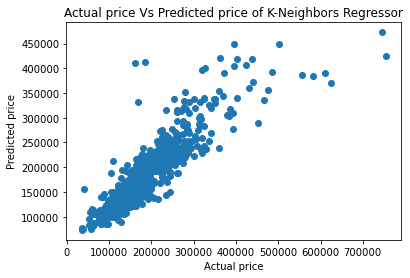

In [370]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_kn_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of K-Neighbors Regressor')
plt.show()

In [371]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)
print('Accuracy of knn :',kn_accuracy*100)
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

R Square Score of K-Neighbors Regressor: 0.7381829920787983
Accuracy of knn : 73.81829920787983
mean absolute error of K-Neighbors Regressor is:  26084.265979381446
mean squared error of K-Neighbors Regressor is:  1355019945.0294158
Root mean squared error of K-Neighbors Regressor is:  36810.595553854


In [372]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)#Model Prediction with trained data:
y_rf_pred = rf.predict(x_train)
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rf_pred))

R Square Score of Random Forest Regressor: 0.9771970848771053


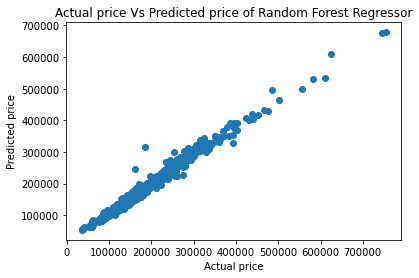

In [373]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rf_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Random Forest Regressor')
plt.show()

In [374]:
# Predicting test data with model:
y_test_rf_pred = rf.predict(x_test)

In [375]:
rf_accuracy = metrics.r2_score(y_test,y_test_rf_pred)
print("R Square Score of Random Forest Regressor:",rf_accuracy)
print('Accuracy of RFR :',rf_accuracy*100)

R Square Score of Random Forest Regressor: 0.8915601167540613
Accuracy of RFR : 89.15601167540613


In [376]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rf_pred))
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rf_pred))
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rf_pred)))

mean absolute error of Random Forest Regressor:  16721.09618556701
mean squared error of Random Forest Regressor is:  561224825.6963185
Root mean squared error of Random Forest Regressor is:  23690.18416341077


In [377]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
#Model Prediction with trained data:
y_dt_pred = dt.predict(x_train)
print("R Square Score of Decision Tree Regressor: ",metrics.r2_score(y_train,y_dt_pred))

R Square Score of Decision Tree Regressor:  1.0


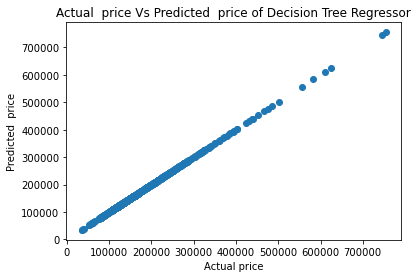

In [378]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_dt_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted  price')
plt.title('Actual  price Vs Predicted  price of Decision Tree Regressor')
plt.show()

In [379]:
# Predicting test data with model:
y_test_dt_pred = dt.predict(x_test)
dt_accuracy = metrics.r2_score(y_test,y_test_dt_pred)
print("R Square Score of Decision Tree Regressor:",dt_accuracy)
print('Accuracy of dt :',dt_accuracy*100)
print ('mean absolute error of Decision Tree Regressor: ',mean_absolute_error(y_test,y_test_dt_pred))
print ('mean squared error of Decision Tree Regressor: ',mean_squared_error(y_test,y_test_dt_pred))
print ('Root mean squared error of Decision Tree Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_dt_pred)))

R Square Score of Decision Tree Regressor: 0.704369871671513
Accuracy of dt : 70.4369871671513
mean absolute error of Decision Tree Regressor:  27123.24742268041
mean squared error of Decision Tree Regressor:  1530017944.2783506
Root mean squared error of Decision Tree Regressor:  39115.443807764095


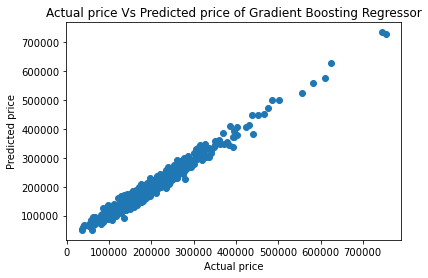

In [380]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_gbr_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Gradient Boosting Regressor')
plt.show()

In [381]:
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)
gbr_accuracy = metrics.r2_score(y_test,y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(y_test,y_test_gbr_pred))
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(y_test,y_test_gbr_pred))
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_gbr_pred)))

R Square Score of Gradient Boosting Regressor: 0.8927653720989206
Accuracy of GBR : 89.27653720989206
mean absolute error of Gradient Boosting Regressor:  16037.23461741054
mean squared error of Gradient Boosting Regressor is:  554987091.012447
Root mean squared error of Gradient Boosting Regressor:  23558.163999183955


In [382]:
##Regularization using Lasso:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)
#best alpha parameter
alpha = lasscv.alpha_
alpha
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.7557605859913693

In [383]:
##Regularization Using Ridge:
from array import array
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)
ridge_alpha= ridgecv.alpha_
ridge_alpha
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)
ridge_model.score(x_test,y_test)

0.7324193872453821

In [384]:
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('kn_cv_mean :',kn_cv_score.mean()*100)
rf_cv_score = cross_val_score(rf,x_train,y_train,cv=5,scoring='r2')
print(rf_cv_score)
print('rf_cv_mean :',rf_cv_score.mean()*100)
gbr_cv_score = cross_val_score(gbr,x_train,y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('gbr_cv_mean :',gbr_cv_score.mean()*100)
dt_cv_score = cross_val_score(dt,x_train,y_train,cv=5,scoring='r2')
print(dt_cv_score)
print('dt_cv_mean :',dt_cv_score.mean()*100)

[0.69607248 0.6770343  0.74982787 0.6476461  0.5709105 ]
kn_cv_mean : 66.82982516277752
[0.84794048 0.86522836 0.87989331 0.7944947  0.71953086]
rf_cv_mean : 82.1417542882191
[0.89910167 0.87645609 0.89720579 0.82836627 0.77831305]
gbr_cv_mean : 85.58885750035529
[0.78388387 0.61066101 0.75050531 0.7281559  0.58615393]
dt_cv_mean : 69.18720045315024


#### Of the four models created and trained now the differnce between  each of the model's r2 score and cv_mean will be found and the least scoring model will be selected as the model for hypertunning and will later on be used to  predict the test data. 

In [385]:
KNN= (kn_accuracy*100)-(kn_cv_score.mean()*100)
print(KNN)

6.988474045102308


In [386]:
RF=(rf_accuracy*100)-(rf_cv_score.mean()*100)
print(RF)

7.01425738718703


In [387]:
DT= (dt_accuracy*100)- (dt_cv_score.mean()*100)
print(DT)

1.2497867140010612


In [388]:
GBR=(gbr_accuracy*100) -(gbr_cv_score.mean()*100)
print(GBR)

3.6876797095367664


### Hyperparameter tunning for DecisionTreeRegressor using GridSearchCV.

In [389]:
grid_param={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
dt = DecisionTreeRegressor()
gbr_search=GridSearchCV(dt,param_grid=grid_param,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
gbr_search.fit(x_train,y_train)
gbr_search.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [390]:
dtr= DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=70,
                      min_samples_leaf=10, min_weight_fraction_leaf=0.1)

dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
66.93195233812116


In [391]:
x_train.shape

(870, 185)

In [392]:
x_test= df_Test

In [394]:
x_test.shape

(290, 185)

In [396]:
dtr= DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=70,
                      min_samples_leaf=10, min_weight_fraction_leaf=0.1)

dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
score=dtr.score(x_train, y_train)
print(dtr,':',score)

DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=70,
                      min_samples_leaf=10, min_weight_fraction_leaf=0.1) : 0.6516954318241571
